# ANOVA  - Lab

## Introduction

In this lab, you'll get some brief practice generating an ANOVA table (AOV) and interpreting its output. You'll also perform some investigations to compare the method to the t-tests you previously employed to conduct hypothesis testing.

## Objectives

In this lab you will: 

- Use ANOVA for testing multiple pairwise comparisons 
- Interpret results of an ANOVA and compare them to a t-test

## Load the data

Start by loading in the data stored in the file `'ToothGrowth.csv'`: 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ToothGrowth.csv')

In [3]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [4]:
df.describe()

# Looks like len is continuous
# Dose looks like it might be categorical

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

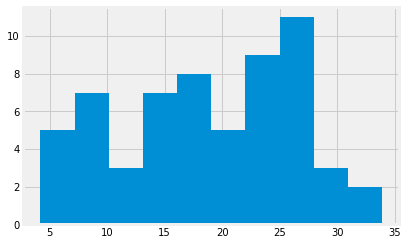

In [6]:
df['len'].hist()

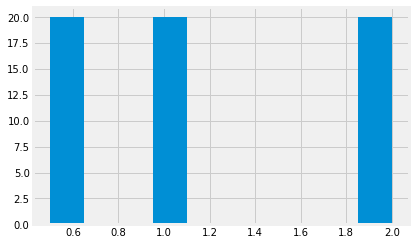

In [7]:
df['dose'].hist()

# Yeah, dose looks cateegorical.

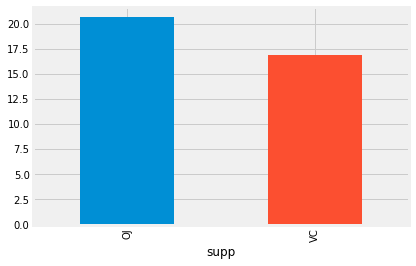

In [8]:
# Do some groupbys as part of my EDA (Exploratory Data Analysis)
# to get a preview of how supp and dose might effect tooth length

df.groupby('supp')['len'].mean().plot(kind='bar')

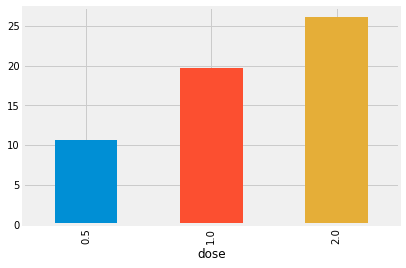

In [9]:
df.groupby('dose')['len'].mean().plot(kind='bar')

In [10]:
# It looks like the OJ supp might have a greater effect on len
# than the VC supp

# And it looks like the dosage has a strong positive correlation
# with tooth length

# Good to do this EDA as a sanity check
# Let's see if the ANOVA test backs these findings up

## Generate the ANOVA table

Now generate an ANOVA table in order to analyze the influence of the medication and dosage:  

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
formula = 'len ~ C(supp) + C(dose)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2) # It's a 2-table test
print(table)

               sum_sq    df          F        PR(>F)
C(supp)    205.350000   1.0  14.016638  4.292793e-04
C(dose)   2426.434333   2.0  82.810935  1.871163e-17
Residual   820.425000  56.0        NaN           NaN


## Interpret the output

Make a brief comment regarding the statistics and the effect of supplement and dosage on tooth length: 

In [ ]:
# Both supplement and dosage have a significant effect on tooth length.
# However, dosage has a much greater effect than supplement.

## Compare to t-tests

Now that you've had a chance to generate an ANOVA table, its interesting to compare the results to those from the t-tests you were working with earlier. With that, start by breaking the data into two samples: those given the OJ supplement, and those given the VC supplement. Afterward, you'll conduct a t-test to compare the tooth length of these two different samples: 

In [17]:
# Create seperate DFs for each of the two supps

df_oj = df[df['supp'] == 'OJ']
df_vc = df[df['supp'] == 'VC']

Now run a t-test between these two groups and print the associated two-sided p-value: 

In [14]:
# Calculate the 2-sided p-value for a t-test comparing the two supplement groups
from scipy import stats

In [23]:
# It should be a Welch's t-test (not Student's)
# because the variance (std) are different between the two groups

df_vc['len'].std(), df_oj['len'].std()

(8.266028664664638, 6.605561049722362)

In [26]:
stats.ttest_ind(a=df_oj['len'], b=df_vc['len'], equal_var=False)

Ttest_indResult(statistic=1.91526826869527, pvalue=0.06063450788093387)

## A 2-Category ANOVA F-test is equivalent to a 2-tailed t-test!

Now, recalculate an ANOVA F-test with only the supplement variable. An ANOVA F-test between two categories is the same as performing a 2-tailed t-test! So, the p-value in the table should be identical to your calculation above.

> Note: there may be a small fractional difference (>0.001) between the two values due to a rounding error between implementations. 

In [27]:
# Your code here; conduct an ANOVA F-test of the oj and vc supplement groups.
# Compare the p-value to that of the t-test above. 
# They should match (there may be a tiny fractional difference due to rounding errors in varying implementations)

formula = 'len ~ C(supp)' # leaving out C(dose) for this one
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2) # It's a 2-table test
print(table)

# Yeah. It's pretty much the same (~0.0603).

               sum_sq    df         F    PR(>F)
C(supp)    205.350000   1.0  3.668253  0.060393
Residual  3246.859333  58.0       NaN       NaN


## Run multiple t-tests

While the 2-category ANOVA test is identical to a 2-tailed t-test, performing multiple t-tests leads to the multiple comparisons problem. To investigate this, look at the various sample groups you could create from the 2 features: 

In [28]:
for group in df.groupby(['supp', 'dose'])['len']:
    group_name = group[0]
    data = group[1]
    print(group_name)

('OJ', 0.5)
('OJ', 1.0)
('OJ', 2.0)
('VC', 0.5)
('VC', 1.0)
('VC', 2.0)


While bad practice, examine the effects of calculating multiple t-tests with the various combinations of these. To do this, generate all combinations of the above groups. For each pairwise combination, calculate the p-value of a 2-sided t-test. Print the group combinations and their associated p-value for the two-sided t-test.

In [53]:
# Your code here; reuse your t-test code above to calculate the p-value for a 2-sided t-test
# for all combinations of the supplement-dose groups listed above. 
# (Since there isn't a control group, compare each group to every other group.)

from itertools import combinations

combos = combinations(group_name, 2)


groups = [group[0] for group in df.groupby(['supp', 'dose'])['len']] # Is it necessary to include the ['len']? Ask Abhineet
combos = combinations(groups, 2)
for combo in combos:
    supp1 = combo[0][0]
    dose1 = combo[0][1]
    supp2 = combo[1][0]
    dose2 = combo[1][1]
    sample1 = df[(df.supp == supp1) & (df.dose == dose1)]['len']
    sample2 = df[(df.supp == supp2) & (df.dose == dose2)]['len']
    p = stats.ttest_ind(sample1, sample2, equal_var=False)[1]
    print(combo, p)
    
# Why doesn't it ever leave the for loop?
# Won't one test just override the last one?
# Ask Abhineet

(('OJ', 0.5), ('OJ', 1.0)) 8.784919055161479e-05
(('OJ', 0.5), ('OJ', 2.0)) 1.3237838776972294e-06
(('OJ', 0.5), ('VC', 0.5)) 0.006358606764096813
(('OJ', 0.5), ('VC', 1.0)) 0.04601033257637553
(('OJ', 0.5), ('VC', 2.0)) 7.196253524006043e-06
(('OJ', 1.0), ('OJ', 2.0)) 0.039195142046244004
(('OJ', 1.0), ('VC', 0.5)) 3.6552067303259103e-08
(('OJ', 1.0), ('VC', 1.0)) 0.001038375872299884
(('OJ', 1.0), ('VC', 2.0)) 0.09652612338267014
(('OJ', 2.0), ('VC', 0.5)) 1.3621396478988818e-11
(('OJ', 2.0), ('VC', 1.0)) 2.3610742020468435e-07
(('OJ', 2.0), ('VC', 2.0)) 0.9638515887233756
(('VC', 0.5), ('VC', 1.0)) 6.811017702865016e-07
(('VC', 0.5), ('VC', 2.0)) 4.6815774144921145e-08
(('VC', 1.0), ('VC', 2.0)) 9.155603056638692e-05


In [ ]:
# Notice that the null hypothesis fails to be rejected two times:
# pvals of 0.096 and 0.963

In [47]:
groups

[('OJ', 0.5), ('OJ', 1.0), ('OJ', 2.0), ('VC', 0.5), ('VC', 1.0), ('VC', 2.0)]

In [51]:
supp1, dose1, supp2, dose2

('VC', 1.0, 'VC', 2.0)

## Summary

In this lesson, you implemented the ANOVA technique to generalize testing methods to multiple groups and factors.